# **CSCI 4341 – Big Data Analytics Assignment**

##**Name: Zobayer Md Ahsanul Mahbub**

##**Matric No:2125129**

Email ID: zobayerlabib9671@gmail.com  
Dataset Used: Stroke Prediction Dataset  
Submission Date:June 18, 2025

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.info()
df.describe()
df.isnull().sum()
df['gender'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,count
gender,
Female,2994
Male,2115
Other,1


In [3]:
#drop id column because it is just a serial number
df.drop(columns=['id'], inplace=True)

In [4]:
#drop the row which mentioned other
df = df[df['gender'] != 'Other']

In [5]:
#Fill missing bmi with median value
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
# Confirm cleaning
print(df.info())
df['gender'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB
None


,count
gender,
Female,2994
Male,2115


**Business Case**

Stroke is one of the main causes of disability and death worldwide. However, early identification of risk factors such as age, heart disease, hypertension, lifestyle habits, and glucose levels can play a crucial role to prevent stroke.

This analysis utilizes a healthcare dataset to identify patterns, make predictions, and suggest treatments that may reduce the risk of stroke. Especially, we want to identify high-risk groups. The analysis is designed to help Healthcare providers and policymakers make data-driven decisions.


**Data Science Questions**

1. Is smoking status associated with stroke occurrence? *(Inferential – 2 variables)*
2. Do the people with heart disease have a higher risk of stroke? *(Diagnostic – 2 variables)*
3. Is stroke rate significantly different between genders? *(Inferential – 2 variables)*
4. Can we predict stroke possibility based on age, hypertension, and glucose level? *(Predictive >2 variables)*
5. How do age, BMI, and marital status interact to affect stroke risk in rural areas? *(Exploratory >2 variables)*
6. If we lowered blood sugar levels by 10% in people at high risk, how much could it reduce their chances of having a stroke? *(Prescriptive >2 variables)*
7. After controlling for age and glucose, what is the causal impact of high BMI on stroke? *(Causal >2 variables)*
8. Can stroke patients be clustered into meaningful groups based on lifestyle and health factors? *(Exploratory >2 variables)*


##**DSQ-1: Is smoking status associated with stroke occurrence?**
*   Type: Inferential Analysis
*   Variables Used: smoking_status, stroke
*   Method: Chi-Square Test of Independence

Contingency Table:
stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   814  70
never smoked     1802  90
smokes            747  42

Chi-square statistic = 29.2257
Degrees of freedom = 3
P-value = 2.0077041756108317e-06
There is a significant association between smoking status and stroke.


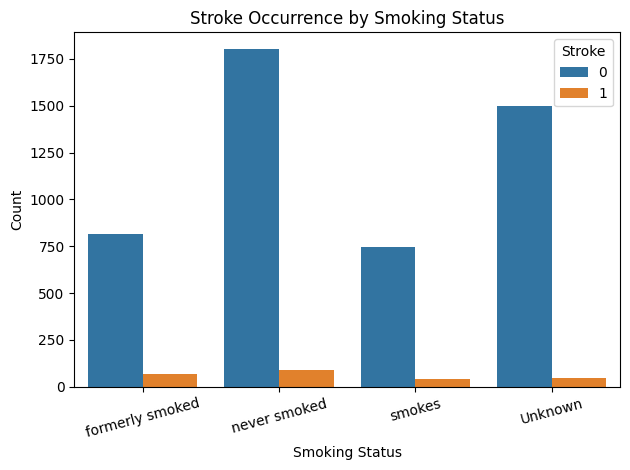

In [ ]:
#DSQ-1: Is smoking status associated with stroke occurrence? (Inferential – 2 variables (smoking_status, stroke))
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

print("Contingency Table:")
print(contingency_table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p}")

# Interpret the result
if p < 0.05:
    print("There is a significant association between smoking status and stroke.")
else:
    print("There is no significant association between smoking status and stroke.")


#Visualization
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Chi-square statistic = 29.2257
Degrees of freedom = 3
P-value = 2.0077041756108317e-06
**There is a significant association between smoking status and stroke.**

## **DSQ-2: Do people with heart disease have a higher likelihood of stroke?**
*   Type: Diagnostic Analysis
*   Variables Used: heart_disease, stroke
*   Method: Chi-Square Test of Independence

Contingency Table:
stroke            0    1
heart_disease           
0              4631  202
1               229   47

Chi-square statistic = 90.2294
Degrees of freedom = 1
P-value = 2.12e-21
There is a significant association between heart disease and stroke.


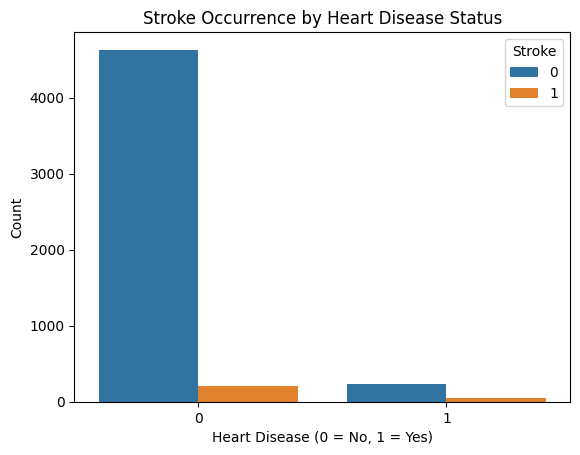

In [ ]:
#DSQ-2: Do people with heart disease have a higher likelihood of stroke?

#contingency table
contingency_table= pd.crosstab(df['heart_disease'], df['stroke'])

print("Contingency Table:")
print(contingency_table)

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.2e}")

# Interpret the result
if p < 0.05:
    print("There is a significant association between heart disease and stroke.")
else:
    print("There is no significant association between heart disease and stroke.")

# Visualization
sns.countplot(data=df,x='heart_disease', hue='stroke')
plt.title('Stroke Occurrence by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


Chi-square statistic = 90.2294
Degrees of freedom = 1
P-value = 2.12e-21
**There is a significant association between heart disease and stroke.**

##**DSQ-3: Is stroke occurrence significantly different between genders?**

* Type: Inferential Analysis
* Variables Used: gender, stroke
* Method: Chi-Square Test of Independence

Contingency Table:
stroke     0    1
gender           
Female  2853  141
Male    2007  108

Chi-square statistic = 0.3400
Degrees of freedom = 1
P-value =  0.55983
There is no significant association between gender and stroke.


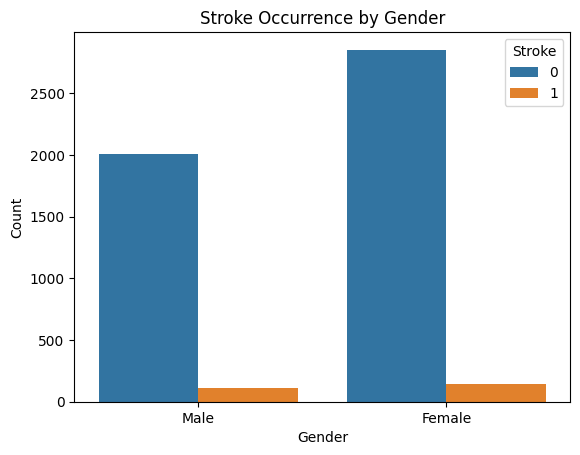

In [27]:
#DSQ-3: Is stroke occurrence significantly different between genders?
# Contingency table create
contingency_table = pd.crosstab(df['gender'], df['stroke'])

print("Contingency Table:")
print(contingency_table)

#Chi-square test
from scipy.stats import chi2_contingency
chi2,p, dof,expected =chi2_contingency(contingency_table)

print(f"\nChi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p: .5f}")

#Interpretation
if p < 0.05:
    print("There is a significant association between gender and stroke.")
else:
    print("There is no significant association between gender and stroke.")

# Visualization
sns.countplot(data=df,x='gender',hue='stroke')
plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


Chi-square statistic = 0.3400
Degrees of freedom = 1
P-value =  0.55983
**There is no significant association between gender and stroke.**

## **DSQ-4: Can we predict stroke possibility based on age, hypertension, and glucose level?**

* Type: Predictive Analysis
* Variables Used: age, hypertension, avg_glucose_level, stroke
* Method: Build a classification model (Here we are using logistic regression) to predict stroke.


In [6]:
#DSQ-4: Can we predict stroke possibility based on age, hypertension, and glucose level?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Selecting features and target
X = df[['age', 'hypertension', 'avg_glucose_level']]
y = df['stroke']

#Train-test spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#logistic regression model building
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Predict
y_pred =model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion matrix and performance report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]})
print(coef_df)



Confusion Matrix:
 [[960   0]
 [ 62   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score: 0.9393346379647749
             Feature  Coefficient
0                age     0.070249
1       hypertension     0.327151
2  avg_glucose_level     0.004051


The model predicted all samples as "No Stroke" (0). It missed every actual stroke case (62 false negatives). So, Precision, recall, and F1 for stroke = 0.00.
This problem happend becasue of **class imbalance** problem. Only 5% case in the dataset is stroke prositive and rest negative.
We can solve it by balancing the class.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Features and label
X =df[['age', 'hypertension', 'avg_glucose_level']]
y = df['stroke']

#Train-test split
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#Use class balanced
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Prediction
y_pred= model.predict(X_test)

#Evaluate the model
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:",accuracy_score(y_test, y_pred))

# display feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]})
print("\nFeature Importance:")
print(coef_df)


Confusion Matrix:
 [[701 259]
 [ 15  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.15      0.76      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.74      0.55      1022
weighted avg       0.93      0.73      0.80      1022

Accuracy Score: 0.7318982387475538

Feature Importance:
             Feature  Coefficient
0                age     0.072483
1       hypertension     0.472802
2  avg_glucose_level     0.004792


The model successfully detected 47 out of 62 stroke cases. It is an improvement compared to the previous result because previously it predicted 0 cases. Based on the result **Hypertension** has the strongest connection among the three features. To avoid missing true cases we focused on recall  than overall accuracy.

##**DSQ-5: How do age, BMI, and marital status affect stroke in rural areas?**


*  Type: Diagnostic Analysis
*  Variables Used: age, bmi, ever_married, Residence_type, stroke
*  Filtered By: Residence_type = Rural

Rural population count: 2513
Grouped Stroke Rates:
   ever_married    bmi_group    age_group  Stroke Rate
0            No  Underweight        Young     0.000000
1            No  Underweight  Middle-aged          NaN
2            No  Underweight        Older     0.000000
3            No  Underweight      Elderly          NaN
4            No       Normal        Young     0.000000
5            No       Normal  Middle-aged     0.000000
6            No       Normal        Older     0.000000
7            No       Normal      Elderly     0.200000
8            No   Overweight        Young     0.000000
9            No   Overweight  Middle-aged     0.000000
10           No   Overweight        Older     0.000000
11           No   Overweight      Elderly     0.250000
12           No        Obese        Young     0.009804
13           No        Obese  Middle-aged     0.017857
14           No        Obese        Older     0.086957
15           No        Obese      Elderly     0.076923
16          Ye

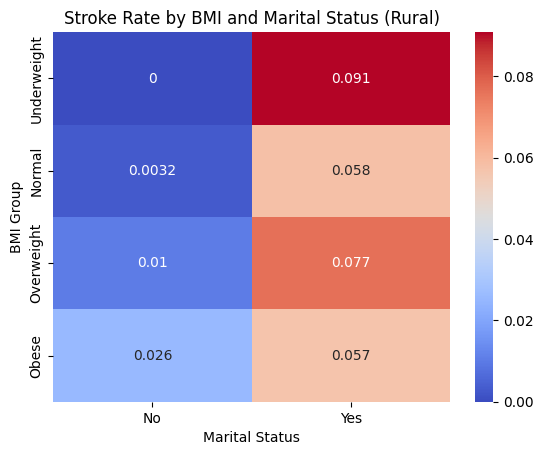

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#filter for Rural residents
rural_df = df[df['Residence_type'] == 'Rural'].copy()
print(f"Rural population count: {len(rural_df)}")

#Handle missing BMI values
rural_df['bmi'] = rural_df['bmi'].fillna(rural_df['bmi'].median())

#Create BMI and Age Groups
rural_df['bmi_group'] = pd.cut(rural_df['bmi'],
                               bins=[0, 18.5, 24.9, 29.9, 100],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

rural_df['age_group'] = pd.cut(rural_df['age'],
                                bins=[0, 30, 50, 70, 100],
                                labels=['Young', 'Middle-aged', 'Older', 'Elderly'])

#grouping and stroke rate calculation
stroke_summary = rural_df.groupby(
    ['ever_married', 'bmi_group', 'age_group'],
    observed=False)['stroke'].mean().reset_index()
stroke_summary= stroke_summary.rename(columns={'stroke': 'Stroke Rate'})
print("Grouped Stroke Rates:")
print(stroke_summary)

# heatmap visualization (BMI vs Marital Status)
pivot_table = rural_df.pivot_table(
    values='stroke',
    index='bmi_group',
    columns='ever_married',
    aggfunc='mean',
    observed=False)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Stroke Rate by BMI and Marital Status (Rural)')
plt.ylabel('BMI Group')
plt.xlabel('Marital Status')
plt.show()


**Methodology:**
- Filtered the dataset to include only rural population (n = 2513).
- Grouped individuals by:
  - Age Group: Young, Middle-aged, Older, Elderly
  - BMI Group: Underweight, Normal, Overweight and Obese
  - Marital Status: Ever Married or Not Married
- Calculated stroke rates in each subgroup.
- Visualized the relationship between BMI group and marital status using a heatmap.

**Key Observations:**

**1. Marital Status Effect:**
- Married individuals showed **higher stroke rates** in most BMI categories compared to unmarried individuals.
- For example:
  - Normal BMI & Married -> stroke rate = 0.058  
  - Normal BMI & Unmarried -> stroke rate = 0.0032

**2. BMI Effect:**
- Among the married group:
  - **Underweight (0.091)** and **Overweight (0.077)** individuals had the highest stroke rates.
- Among the unmarried group:
  - Stroke rate gradually increased from Normal (0.0032) to Obese (0.026)
  - Underweight individuals had a stroke rate of **0%**

**3. Age Effect (from grouped data):**
- Stroke risk increases with age across all BMI groups.
- Elderly and obese individuals had the highest stroke rates, particularly when they are married also.

**Insights:**
- Based on the findings, stroke prevention programs in rural areas should focus on:
  - Elderly individuals
  - Those with high BMI
  - Perticularly married individuals with multiple risk factors
- BMI and marital status may reflect a person's lifestyle or long-term health problems. Later that can lead to stroke.


##**DSQ-6: If we lowered blood sugar levels by 10% in people at high risk, how much could it reduce their chances of having a stroke?**
- Type: Prescriptive Analysis
- Variables Used: avg_glucose_level, age, hypertension, stroke
- Filtered By: high risk = age > 60 and/or hypertension == 1

In [17]:
# define high-risk group
high_risk = df[(df['age'] > 60) | (df['hypertension'] == 1)].copy()

# reduce avg_glucose_level by 10%
high_risk['glucose_reduced'] = high_risk['avg_glucose_level'] * 0.9

# Define X and y (before and after reduction)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Original
X_orig = high_risk[['age', 'hypertension', 'avg_glucose_level']]
y = high_risk['stroke']

# Reduced glucose
X_reduced = high_risk[['age', 'hypertension']].copy()
X_reduced['avg_glucose_level'] = high_risk['glucose_reduced']

# Train-test split
X_train_o, X_test_o, y_train, y_test = train_test_split(X_orig, y, test_size=0.2, random_state=42)
X_train_r, X_test_r = train_test_split(X_reduced, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_o, y_train)

# Predict
pred_orig = model.predict_proba(X_test_o)[:, 1]
pred_reduced = model.predict_proba(X_test_r)[:, 1]

# compare average predicted stroke probability
import numpy as np
print("Mean predicted stroke chance (Original):", np.mean(pred_orig))
print("Mean predicted stroke chance (After 10% glucose reduction):", np.mean(pred_reduced))


Mean predicted stroke chance (Original): 0.46400936646838137
Mean predicted stroke chance (After 10% glucose reduction): 0.4531540288201538


**Insights:**
For high-risk individuals (elderly or hypertensive), the average predicted stroke risk was:
- Original: 46.4%
- After 10% blood sugar reduction: 45.3%

This shows that even small like 10% improvement in glucose control could slightly reduce the stroke risk by around 1.1%.

In public health terms, this can lead to a significant reduction in the number of stroke cases if it applied across large populations.

This type of analysis helps guide preventive strategies for stroke. Especially in diabetic or prediabetic elderly individuals.

##**DSQ-7: After controlling for age and glucose, what is the causal impact of high BMI on stroke?**
- Type: Causal Analysis
- Variables Used: bmi, age, avg_glucose_level, stroke
- Filtered/Transformed: Created high_bmi variable from bmi > 30

In [24]:
#DSQ-7: After controlling for age and glucose, what is the causal impact of high BMI on stroke?
#Create high_bmi flag
df['high_bmi'] = (df['bmi'] > 30).astype(int)

# Drop rows with missing BMI
causal_df = df.dropna(subset=['bmi', 'age', 'avg_glucose_level'])

# Define features and target
X = causal_df[['high_bmi', 'age','avg_glucose_level']]
y = causal_df['stroke']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Coefficients
import pandas as pd
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coef_df)

# Stroke probabilities
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))



             Feature  Coefficient
0           high_bmi    -0.076977
1                age     0.073842
2  avg_glucose_level     0.005323

Accuracy: 0.7279843444227005

Confusion Matrix:
 [[696 264]
 [ 14  48]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.77      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.73      0.80      1022



**Insight**

- After adjusting for age and glucose level, we can see that having high BMI (BMI > 30) showed a slightly negative effect on stroke risk (coefficient = -0.077). Maybe it happend because BMI’s influence is already explained through stronger correlated factors such as age and blood sugar.

In contrast:
- Age had a strong positive effect (+0.074),
- Glucose level had a smaller positive effect (+0.0053).

The model achieved 72.8% accuracy, with high performance on non-stroke cases. However, weak stroke detection (precision = 15%) due to class imbalance.

This result suggests that in this dataset, age and glucose are more significant causal contributors to stroke than BMI.

While BMI remains important facetor but effective prevention may rely more on glucose management and age-targeted interventions in similar populations.

##**DSQ-8: Can stroke patients be clustered into meaningful groups based on lifestyle and health factors?**

- Type: Exploratory Analysis

- Variables Used:
    - Health: age, bmi, avg_glucose_level, hypertension, heart_disease
    - Lifestyle: work_type, smoking_status, ever_married
    - Target/Filter: Only records where stroke == 1

Purpose: Identify the subgroups of stroke patients using clustering.

               age  hypertension  heart_disease  avg_glucose_level        bmi  \
Cluster                                                                         
0        71.238806      0.402985       0.134328         118.784925  29.305970   
1        62.043636      0.090909       0.010101         110.999697  29.553535   
2        71.674699      0.361446       0.445783         169.350361  31.363855   

         stroke  high_bmi  
Cluster                    
0           1.0  0.358209  
1           1.0  0.323232  
2           1.0  0.481928  


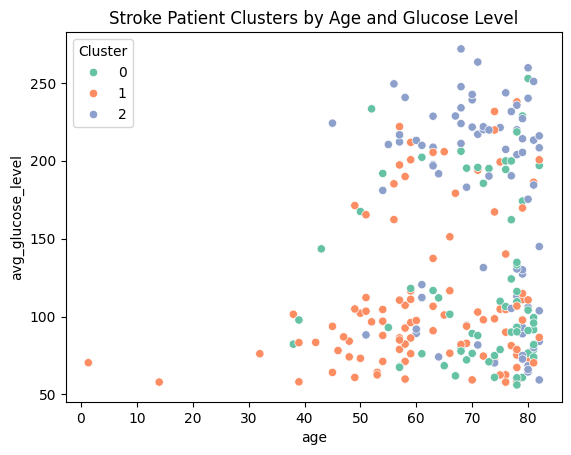

In [25]:
# Filter only the stroke patients
stroke_df = df[df['stroke'] == 1].copy()

# Fill missing BMI with median
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].median())

# Select features for clustering
features = stroke_df[['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease',
                      'work_type', 'smoking_status', 'ever_married']]

# encode categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_encoded)

# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
stroke_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster means
cluster_summary = stroke_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Visualize clusters
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=stroke_df, x='age', y='avg_glucose_level', hue='Cluster', palette='Set2')
plt.title('Stroke Patient Clusters by Age and Glucose Level')
plt.show()


**Insight: Clustering Stroke Patients**

Using KMeans clustering, we identified 3 different stroke patient groups based on health and lifestyle variables (age, BMI, glucose, hypertension, heart disease, etc.).

**Key Cluster Profiles:**
- Cluster 0: Older adults (around 71 yrs), moderate glucose (~118), moderate risk.
- Cluster 1: Younger (around 62 yrs), low glucose (~111), low risk, minimal heart disease.
- Cluster 2: Oldest (around 72 yrs), very high glucose (~169), high heart disease (45%), highest risk.

**Observation:**
- Age and glucose are the most visible factors separating the groups in the scatter plot.
- Cluster 2 showed as the **highest-risk group** due to combined effects of age, glucose, heart disease, and obesity.

These clusters highlight the need for **custom treatment strategies** based on patient profile rather than a one-size-fits-all approach.
